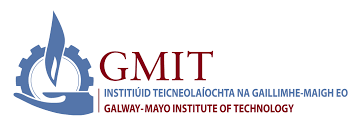

# Fundamentals of Data Analysis Project- Linear Regression

## Aaron Donnelly- G00299531
***

### Introduction

##### Linear Regression is a method used on datasets that generally follow a linear path meaning a straight line. Linear Regression can be useful in making predictions by providing a slope value and an intercept for the equation of the line. When we know these values and and are provided with a good 'r' value. i.e. how well the line fits the data, we can make accurate predictions given only 1 variable. An area where linear regression is used very often is in the pharmaceutical industry and in particular the testing labs. Chromatography is a technique used to quantify the amount of an active ingredient in a formulation. Chromatography is the separation of compounds in a mixture based on a number of variables. Peak area is the name given to the result that an analyst is interested in in relation to chromatography. In order to quantify the amount of a certain chemical is present in a product; known standards are made up in the laboratory. These standards range from a standard amount much lower then what the analyst would expect to obtain from the product, to a standard much higher then what would be expected. Numerous other standards are also prepared in this bracket. Examples would be 1000mg/l, 100mg/l, 10mg/l and 1mg/l. These standards are then run on the HPLC system. The HPLC system is an instrument used in a chemistry lab to perform chromatography. These standards then produce peak areas based on their amounts. These areas follow a linear pattern meaning that the higher the amount the higher the peak area. In the area of chromatography this is then used to calibrate the system. Once this is complete the system basically has the needed values to make a prediction as to the amount of the unknown sample based on the peak area obtained.  This linear line is also known as a calibration curve in chemistry. This technique is used in the vast majority of other analytical techniques in the field of chemistry. For this project I will be using the Numpy library scikit learn, along with matplotlib, and pandas. [1],[2],[3].

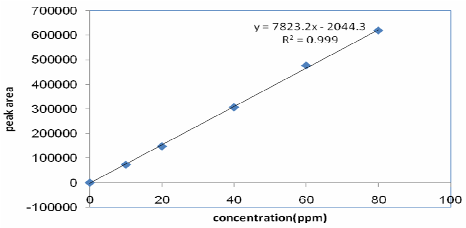
Image taken from: https://www.researchgate.net/figure/Caffeine-calibration-curve-for-HPLC-method_fig1_261012967

In [25]:
# Firstly all the required libraries will be imported.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
# Pandas is set to disply all rows
pd.set_option('display.max_rows', None)
# The dataset is imported from the link provided by Ian
df= pd.read_csv('https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv')
df



,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


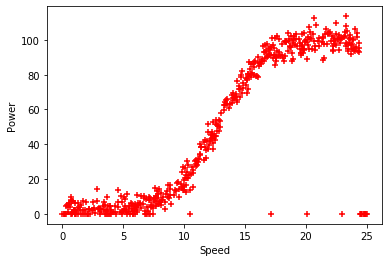

In [2]:
# Matplotlib is imported in order to visualise the dataset.
# Axis are all labelled and a scatter plot is generated in order to see the shape of the data.
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('Speed')
plt.ylabel('Power')
plt.scatter(df.speed, df.power, color = 'red', marker= '+')

In [3]:
# Variable reg is generated in order to fit a linear regression model to the data
reg=linear_model.LinearRegression()
reg.fit(df[['speed']], df.power)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
# A prediction is made in order to test the model. A 2-d array is required for this function to work [4].
reg.predict([[5]])

array([10.6880757])

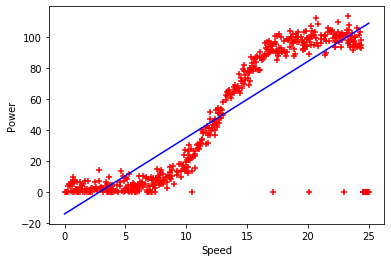

In [5]:
# Again matplotlib is used to fit the linear regression model to the data.
%matplotlib inline
plt.xlabel('Speed')
plt.ylabel('Power')
plt.scatter(df.speed, df.power, color = 'red', marker= '+')
plt.plot(df.speed, reg.predict(df[['speed']]), color= 'blue')


In [6]:
# The reg.score function is used to generated the 'r' value. This will give us an idea of how accurate the predictions are. 
# The closer this value is to 1 the more linear the data and thus the more accurate our predictions would be.
reg.score(df[['speed']], df.power)

0.7289360258564073

##### By the shape of the data as seen above it can be concluded that the data isnt very linear. This would mean that a linear regression model would not be the most suitable to use to make predictions related to this dataset.

##### Using a Polynomial Regression

In [7]:
# From sklearn.preprocessing the PolynomiaFeatures function is imported
from sklearn.preprocessing import PolynomialFeatures
# The Variable polynom is defined. The degree here is set to 4, these are the 3 new variables created.
# As can be seen later in the notebook with a degree= 4 the score obtained is increased to 0.89 which tells us that we have
# obtained a much better fit than before.
polynom= PolynomialFeatures(degree = 4)

In [8]:
# We perform the polynomial fit transformation to the 'speed' variable [5].
X_polynom= polynom.fit_transform(df[['speed']])

In [9]:
X_polynom

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 1.25000000e-01, 1.56250000e-02, 1.95312500e-03,
        2.44140625e-04],
       [1.00000000e+00, 1.50000000e-01, 2.25000000e-02, 3.37500000e-03,
        5.06250000e-04],
       ...,
       [1.00000000e+00, 2.48750000e+01, 6.18765625e+02, 1.53917949e+04,
        3.82870899e+05],
       [1.00000000e+00, 2.49500000e+01, 6.22502500e+02, 1.55314374e+04,
        3.87509363e+05],
       [1.00000000e+00, 2.50000000e+01, 6.25000000e+02, 1.56250000e+04,
        3.90625000e+05]])

In [10]:
Polyreg= linear_model.LinearRegression()

In [11]:
# We now fit a linear reggsion model to the new variable X_polynom which is the speed variable with the polynommial transform
# applied.
Polyreg.fit (X_polynom, df.power)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# We test the new model. And obtain a result much diffrent to the original linear regression model.
Polyreg.predict(polynom.fit_transform([[5]]))

array([2.04114367])

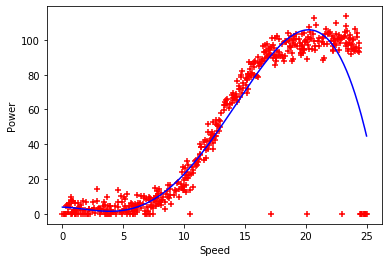

In [13]:
# We visualise the new model and can see that the model fits the dataset much better than before
%matplotlib inline
plt.xlabel('Speed')
plt.ylabel('Power')
plt.scatter(df.speed, df.power, color = 'red', marker= '+')
plt.plot(df.speed, Polyreg.predict(polynom.fit_transform(df[['speed']])), color= 'blue')

In [14]:
#We use the .score function in order to see how well the model fits
Polyreg.score(X_polynom, df.power)

0.8964014745348662

### Other types of Regression [6]

##### Logistical Regression

![alt text](https://miro.medium.com/max/800/0*gKOV65tvGfY8SMem.png)
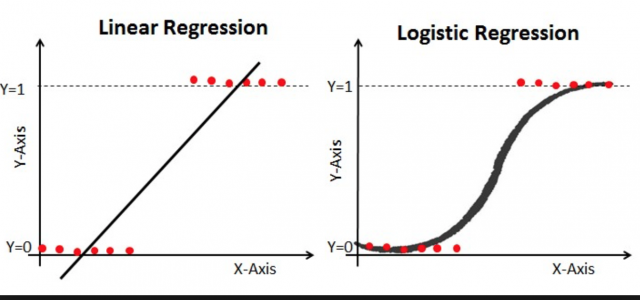
Image taken from: https://medium.com/@ODSC/logistic-regression-with-python-ede39f8573c7

##### Logistical Regression is a form of regression similar to linear regression however instead of predicting a value of one variable based on the ther it predicts the probability of something being true or false based on the value of the x- variable. An example of this would be predicting whether somebody was obeses based on their weight. As can be seend from the above image the y value is either equal to 1 meaning true or equal to 0 meaning false. This type of regression would not be appropriate for our dataset as we require a value to be predicted.

##### Ridge Regression and Lasso Regression [7]

![alt text](https://miro.medium.com/max/3000/1*Jd03Hyt2bpEv1r7UijLlpg.png)


image taken from:https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

##### These method are used to prevent 'over fitting' in the case where the trained model performs well on the training data but poorly on the testing data in machine learning. This method introduces a bias into the trained model in order to more accurately predict values in the test data. This is used to ensure the model is more general and sacrifices performance in the training data for a more accurate perediction in the test data. This is also known as regularisation. Below you can see three types of models. The first shows an example of overfitting a line. The second shows a model that is underfitting the data and the third and final shows a more generalised model. This generalised model would be characteristic of ridge and lasso regression where a slight biased is introduced into the model.

##### In leaset squares regression the minimum sum of the squared residuals are used. For Lasso Regression the minimum sum of the squared residuals are used along with a 'penalising term'. In the case of a Lasso Regression the penalising term is α * the absolute slope. In the case of a Ridge Regression the panalising term is α * (the absolute slope)^2. See image below.

![alt text](https://miro.medium.com/max/3000/1*Jd03Hyt2bpEv1r7UijLlpg.png)
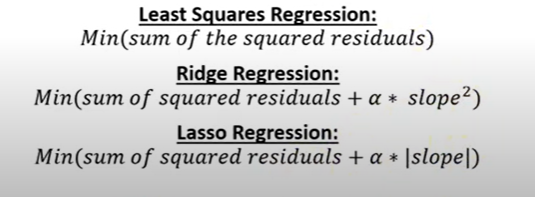

image taken from: Lasso Regression for Beginners | By Dr. Ry @Stemplicity

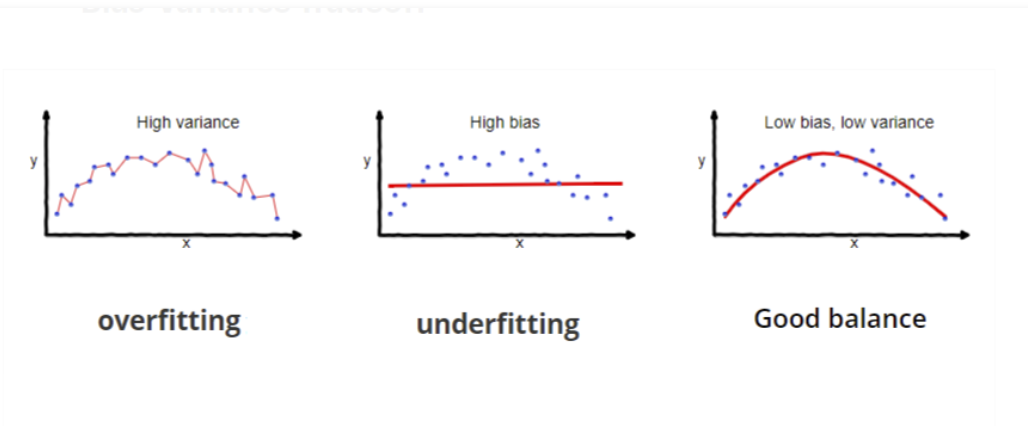
image taken from: https://www.geeksforgeeks.org/lasso-vs-ridge-vs-elastic-net-ml/

### Conclusion

##### It can be seen from above that a simple linear regression model can be generated from the above dataset however due to the shape of the dataset and the R^2 value obtained when using the .score function a linear model wouldnt be the most suitable to use for making accurate predictions. When the Polynomial regression model is used the regression line can be seen to have a much better fit with also a much better R^2 value. The only issue with this however is that the regression model may be overfitting the data. If this is the case then the optimal regression model to use for data such as this would be either the Ridge or Lasso. This would allow us to tilt the linear regression line and perhaps make better predictions from the dataset.

### References